In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
# from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
from langchain.llms import OpenAI
from dotenv import load_dotenv
import os

In [4]:
load_dotenv()

llm = ChatOpenAI(
    model="llama3-70b-8192",  # or "llama3-70b-8192", "mixtral-8x7b-32768", "llama3-8b-8192"
    openai_api_key=os.getenv("GROQ_API_KEY"),
    openai_api_base="https://api.groq.com/openai/v1"
)

response = llm.invoke("Explain the difference between supervised and unsupervised learning in 2 lines.")
print(response.content)

In supervised learning, the machine learning model is trained on labeled data, where the correct output is already known, and the goal is to learn a mapping between input data and the corresponding output labels. In unsupervised learning, the model is trained on unlabeled data, and the goal is to discover patterns, relationships, or structure in the data without prior knowledge of the output.


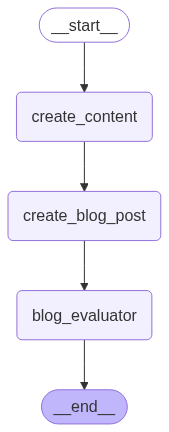

In [15]:
class MyState(TypedDict):
    topic: str
    content: str
    blog : str
    evaluation: str

def create_content(state: MyState) -> MyState:
    """
    Create content based on the topic.
    """
    topic = state['topic']
    prompt = f'Generate a detailed outline for a blog on the topic - {topic}'
    content = llm.invoke(prompt)
    state['content'] = content.content
    return state

def create_blog_post(state: MyState) -> MyState:
    """
    Create a blog post based on the content.
    """
    prompt = f"Create a blog post on the following topic: {state['topic']} and content: {state['content']}"
    blog = llm.invoke(prompt)
    state['blog'] = blog.content
    return state

def blog_evaluator(state: MyState) -> MyState:
    """ Evaluate the blog post.
    """
    prompt = f"Evaluate my blog post: {state['blog']} out of 10 based on the topic: {state['topic']} and the outline: {state['content']}"
    evaluation = llm.invoke(prompt)
    state['evaluation'] = evaluation.content
    return state

graph = StateGraph(MyState)

graph.add_node('create_content',create_content)
graph.add_node('create_blog_post', create_blog_post)
graph.add_node('blog_evaluator', blog_evaluator)

graph.add_edge(START, 'create_content')
graph.add_edge('create_content', 'create_blog_post')
graph.add_edge('create_blog_post', 'blog_evaluator')
graph.add_edge('blog_evaluator', END)

workflow = graph.compile()

initial_state = MyState(topic="Rise of AI in INDIA", content="", blog="")
final_state = workflow.invoke(initial_state)

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())


In [16]:
print("Final State:", final_state)
print("Topic:", final_state['topic'])
print("Evaluation:", final_state['evaluation'])
print("-------------------")
print("Content:", final_state['content'])
print("-------------------")
print("Blog Post:", final_state['blog'])

Final State: {'topic': 'Rise of AI in INDIA', 'content': 'Here is a detailed outline for a blog on the topic "Rise of AI in India":\n\n**Title:** The Rise of AI in India: Opportunities, Challenges, and the Future\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its global impact\n* Importance of exploring AI\'s growth in India\n* Thesis statement: India is rapidly emerging as a hub for AI innovation, with significant opportunities and challenges arising from its adoption.\n\n**II. India\'s AI Landscape**\n\n* Overview of India\'s current AI ecosystem\n* Government initiatives and policies promoting AI development (e.g. NITI Aayog\'s AI strategy)\n* Key industries driving AI adoption in India (e.g. IT, healthcare, finance)\n\n**III. Opportunities in AI Adoption**\n\n* Economic benefits: job creation, GDP growth, and increased productivity\n* Social benefits: improved healthcare, education, and citizen services\n* Enhanced customer experience: personalized s